In [28]:
import pandas as pd

steam_data_filepath = r"..\data\raw\Steam_2024_bestRevenue_1500.csv"

steam_df = pd.read_csv(steam_data_filepath)

imdb_data_filepath = r"..\data\raw\imdb-videogames.csv"

imdb_df = pd.read_csv(imdb_data_filepath)

In [48]:
imdb_name_list = list(imdb_df[imdb_df["year"] > 2020]['name'])

len(imdb_name_list)

1196

In [31]:
steam_df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [37]:
steam_df["name_lower"] = steam_df["name"].str.lower()
imdb_df["name_lower"] = imdb_df["name"].str.lower()

df = pd.merge(steam_df, imdb_df, on="name_lower", how="left")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_x          1501 non-null   object 
 1   releaseDate     1501 non-null   object 
 2   copiesSold      1501 non-null   int64  
 3   price           1501 non-null   float64
 4   revenue         1501 non-null   float64
 5   avgPlaytime     1501 non-null   float64
 6   reviewScore     1501 non-null   int64  
 7   publisherClass  1501 non-null   object 
 8   publishers      1500 non-null   object 
 9   developers      1499 non-null   object 
 10  steamId         1501 non-null   int64  
 11  name_lower      1501 non-null   object 
 12  Unnamed: 0      35 non-null     float64
 13  name_y          35 non-null     object 
 14  url             35 non-null     object 
 15  year            33 non-null     float64
 16  certificate     15 non-null     object 
 17  rating          14 non-null     f

In [50]:
df[df["Sci-Fi"].notna()]["name_lower"]

1                              earth defense force 6
6                                      the universim
109                                            tchia
119                                   shipwrecked 64
256                                  everafter falls
356                                       open roads
451                 sam & max: the devil's playhouse
452                                         paradise
551                       sky: children of the light
576                                        new cycle
591                                 goat simulator 3
599                                alone in the dark
600                                alone in the dark
604                                star trek legends
618                                    haunted house
778                       riviera: the promised land
1149                            raid: shadow legends
1153                               between the stars
1156                                        en

In [7]:
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [10]:
#convert date column to date format
def clean_date(df):
    df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%d-%m-%Y')
    return df


In [11]:
clean_date(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1500 non-null   object        
 1   releaseDate     1500 non-null   datetime64[ns]
 2   copiesSold      1500 non-null   int64         
 3   price           1500 non-null   float64       
 4   revenue         1500 non-null   float64       
 5   avgPlaytime     1500 non-null   float64       
 6   reviewScore     1500 non-null   int64         
 7   publisherClass  1500 non-null   object        
 8   publishers      1499 non-null   object        
 9   developers      1498 non-null   object        
 10  steamId         1500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 129.0+ KB


In [9]:
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [20]:
def filter_review_and_revenue(df):
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['reviewScore'] > 0]
    filtered_df = filtered_df[(filtered_df['revenue'] < 200000000) & (filtered_df['revenue'] > 1000000)]
    
    return filtered_df

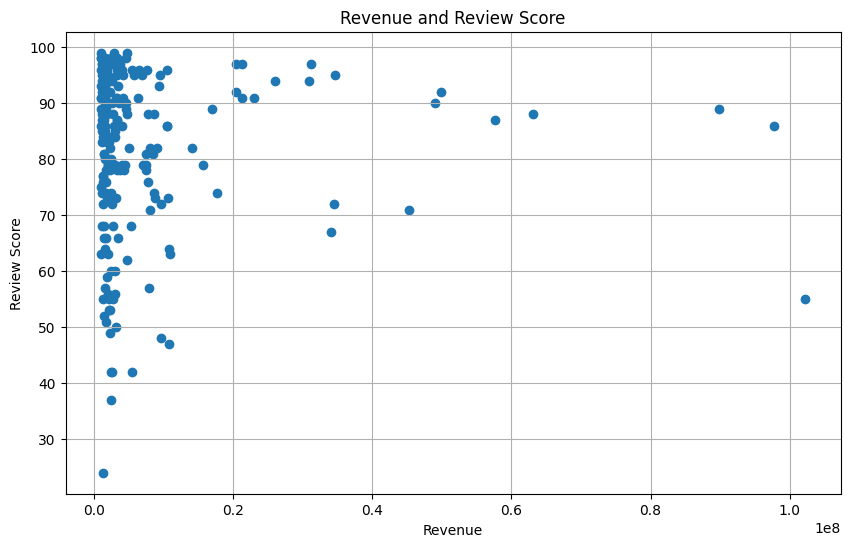

In [23]:
filtered_df = filter_review_and_revenue(df)

import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['revenue'], filtered_df['reviewScore'])
plt.title('Revenue and Review Score')
plt.xlabel('Revenue')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

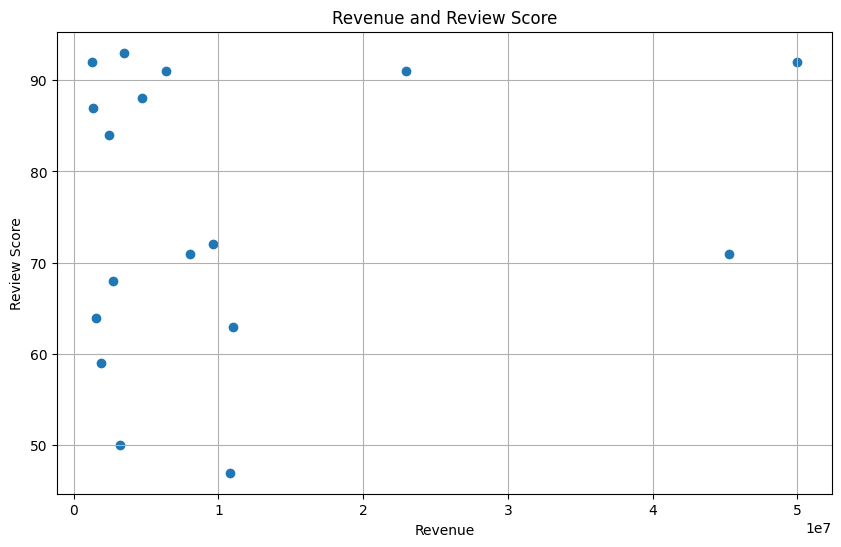

In [24]:
filtered_df = filter_review_and_revenue(df)
AAA_only = filtered_df[filtered_df["publisherClass"] == "AAA"]
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(AAA_only['revenue'], AAA_only['reviewScore'])
plt.title('Revenue and Review Score')
plt.xlabel('Revenue')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

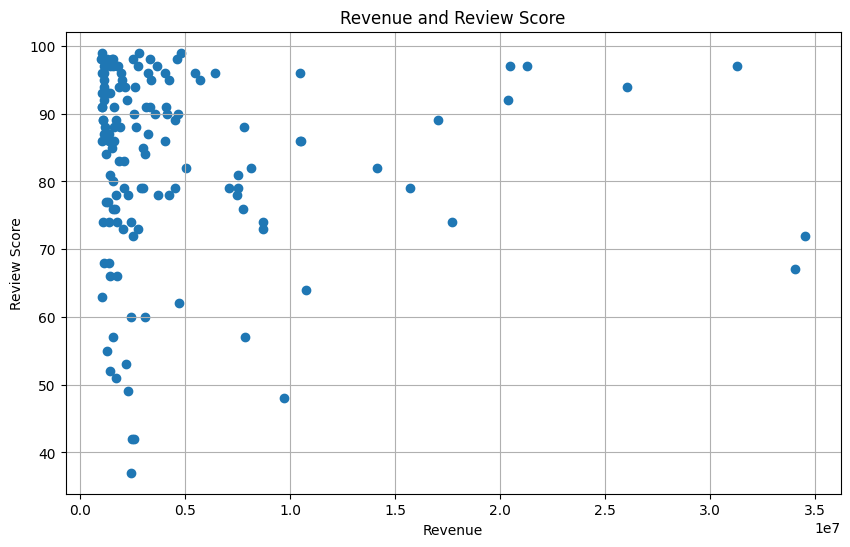

In [25]:
filtered_df = filter_review_and_revenue(df)
indie_only = filtered_df[filtered_df["publisherClass"] == "Indie"]
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(indie_only['revenue'], indie_only['reviewScore'])
plt.title('Revenue and Review Score')
plt.xlabel('Revenue')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

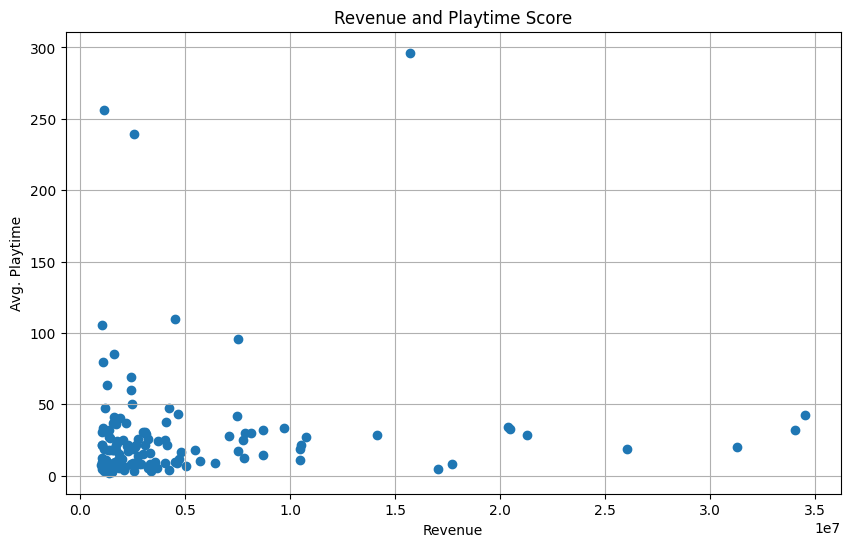

In [26]:
filtered_df = filter_review_and_revenue(df)
indie_only = filtered_df[filtered_df["publisherClass"] == "Indie"]
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(indie_only['revenue'], indie_only['avgPlaytime'])
plt.title('Revenue and Playtime Score')
plt.xlabel('Revenue')
plt.ylabel('Avg. Playtime')
plt.grid(True)
plt.show()

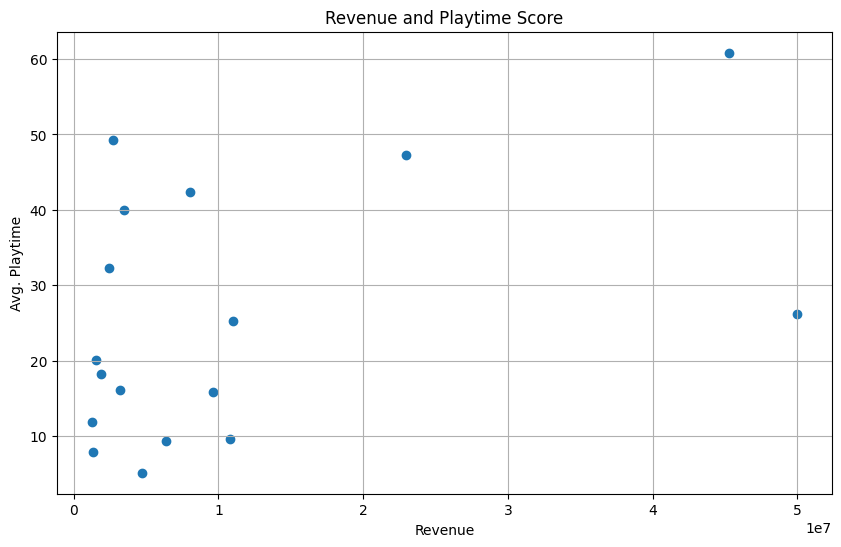

In [27]:
filtered_df = filter_review_and_revenue(df)
AAA_only = filtered_df[filtered_df["publisherClass"] == "AAA"]
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(AAA_only['revenue'], AAA_only['avgPlaytime'])
plt.title('Revenue and Playtime Score')
plt.xlabel('Revenue')
plt.ylabel('Avg. Playtime')
plt.grid(True)
plt.show()